In [1]:
"""
this is the code for generating figures in the article:

https://zhuanlan.zhihu.com/p/34354271

which is from 
Mandy, David. Producers, Consumers, and Partial Equilibrium. Academic Press, 2016, p30-31
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound, fsolve

a = 10 # market base
b = 2   # demand sensitivity for its own price
d_0 = 1 # demand sensitivity for rival's price
c = 1 # constant marginal cost
p_r = 3 # rival's price

def q(d, p):
    return a - b*p + d*p_r
def pi(p, q):
    return (p-c)*q
def p_star(d):
    return (c+(a+d*p_r)/b)/2
def pi_star(d):
    return pi(p_star(d), q(d, p_star(d)))
def pi_tilde(d_0, d):
    return pi(p_star(d_0), q(d, p_star(d_0)))

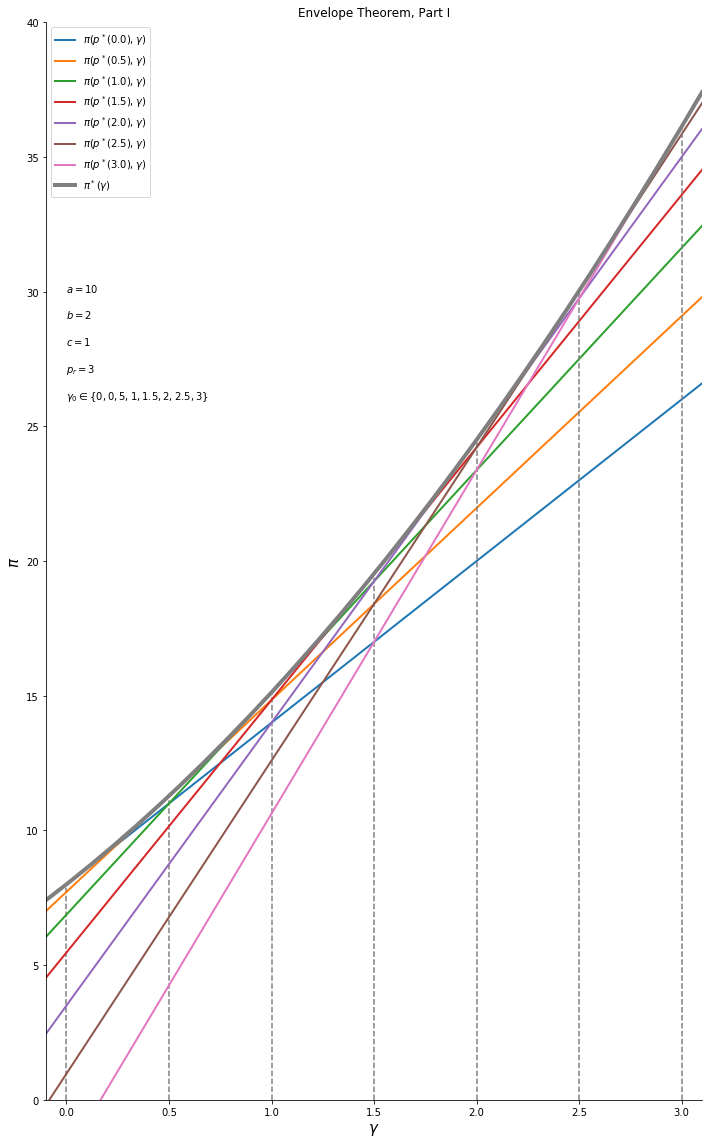

In [2]:
D = np.linspace(-0.1, 3.1, 30)
D_0 = np.linspace(0, 3, 7)
Pi_star = [pi_star(d) for d in D]
Pi_tilde = [[pi_tilde(d_0, d) for d in D] for d_0 in D_0]
fig, ax = plt.subplots(figsize=(10, 16))

for i in range(len(D_0)):
    ax.plot(D, Pi_tilde[i], label=r'$\pi(p^*({}), \gamma )$'.format(D_0[i]), lw=2)
    plt.axvline(x=D_0[i], ymax=pi_star(D_0[i])/40, ymin=0, color='grey', linestyle='--')
ax.plot(D, Pi_star, label = r'$\pi^*(\gamma )$', lw=4)
ax.legend()
ax.set_ylim(0, 40)
ax.set_xlim(-0.1, 3.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r'$\pi$', fontsize=15)
ax.set_xlabel(r'$\gamma $', fontsize=15)
ax.set_title('Envelope Theorem, Part I')
ax.text(0, 30, r'$a=10$')
ax.text(0, 29, r'$b=2$')
ax.text(0, 28, r'$c=1$')
ax.text(0, 27, r'$p_r=3$')
ax.text(0, 26, r'$\gamma _0\in\{0, 0,5, 1, 1.5, 2, 2.5, 3\}$')
plt.tight_layout()
plt.show()